## Multi- class Image Classification

We 've just been through a bunch of the following steps with a
binary classification problem (pizza vs. steak), now we' re
going to step things up a notch with 10 classes of food
(multi—class classification) .


1. Become on with the data
2. Preprocess the data(get it ready for a model)
3. Create a model (Start with baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust diffent hyperparameters and improve the model(try to beat baseline/reduce overfittng)
7. Repeat until satisfied

##1. Import become one with the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()


--2024-03-07 16:01:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.234.207, 108.177.112.207, 74.125.124.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.234.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  44.8MB/s    in 6.1s    

2024-03-07 16:01:47 (81.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

#wWalk thorogh 10 classes fo food image data

for dirpath,dirnames,filenames in os.walk("/content/10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directoris and {len(filenames)} images in {dirpath}.")

There are 2 directoris and 0 images in /content/10_food_classes_all_data.
There are 10 directoris and 0 images in /content/10_food_classes_all_data/test.
There are 0 directoris and 250 images in /content/10_food_classes_all_data/test/chicken_curry.
There are 0 directoris and 250 images in /content/10_food_classes_all_data/test/ramen.
There are 0 directoris and 250 images in /content/10_food_classes_all_data/test/ice_cream.
There are 0 directoris and 250 images in /content/10_food_classes_all_data/test/grilled_salmon.
There are 0 directoris and 250 images in /content/10_food_classes_all_data/test/pizza.
There are 0 directoris and 250 images in /content/10_food_classes_all_data/test/fried_rice.
There are 0 directoris and 250 images in /content/10_food_classes_all_data/test/sushi.
There are 0 directoris and 250 images in /content/10_food_classes_all_data/test/hamburger.
There are 0 directoris and 250 images in /content/10_food_classes_all_data/test/chicken_wings.
There are 0 directoris an

In [3]:
# Setup the train and test directories


train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [4]:
# Let's get the class names

import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [5]:
type(class_names)

numpy.ndarray

In [6]:
type(data_dir)

pathlib.PosixPath

In [7]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


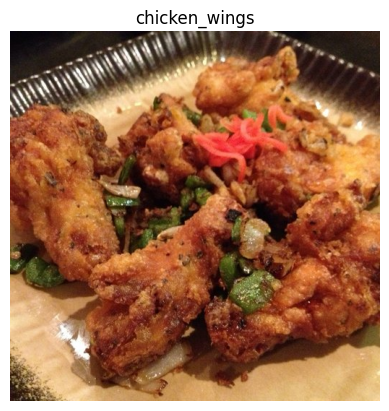

In [8]:
#Visualize the data

import random

img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

Preparing  data (turning it into tensors)

#2. Preprocess the data(prepare it for a model)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale

train_datagen = ImageDataGenerator(1/255.)
test_datagen = ImageDataGenerator(1/255.)

# Load data in from directores and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical"
                                               )

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Building a multi-class CNN model

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_8.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

##Fit a model

In [11]:

# Fit the model
history_8 = model_8.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


235/235 [==============================] - 33s 118ms/step - loss: 9.0273 - accuracy: 0.1141 - val_loss: 2.2901 - val_accuracy: 0.1328
Epoch 2/5
235/235 [==============================] - 28s 118ms/step - loss: 2.1954 - accuracy: 0.1965 - val_loss: 2.2926 - val_accuracy: 0.1492
Epoch 3/5
235/235 [==============================] - 28s 117ms/step - loss: 1.9114 - accuracy: 0.3321 - val_loss: 2.4048 - val_accuracy: 0.1564
Epoch 4/5
235/235 [==============================] - 27s 114ms/step - loss: 1.3880 - accuracy: 0.5392 - val_loss: 2.7237 - val_accuracy: 0.1576
Epoch 5/5
235/235 [==============================] - 29s 124ms/step - loss: 0.9036 - accuracy: 0.7117 - val_loss: 3.4136 - val_accuracy: 0.1560


In [12]:
len(train_data)

235

##5. Evaluate the model

In [15]:
# Evaluate on the test data
model_8.evaluate(test_data)

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


79/79 [==============================] - 11s 132ms/step - loss: 3.4136 - accuracy: 0.1560


[3.4135944843292236, 0.15600000321865082]

In [16]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

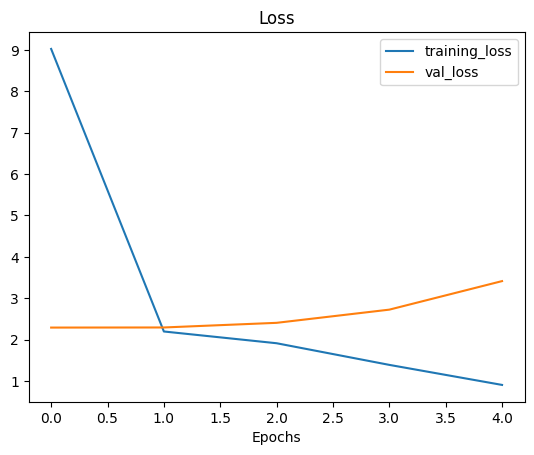

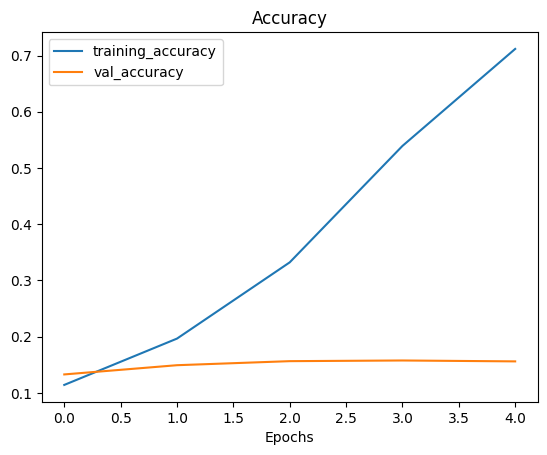

In [17]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_8)

# Still Working on this project to maximize the accuracys using transfer learning